# Gender-Auswertung erste drei Republik-Jahre

Dieses Skript lädt Daten aus Google Sheets, erstellt einige deskriptive Statistiken und exportiert fixfertige csv-Dateien, die ins Publikator-Charttool reinkopiert werden können.

## Setup

In [2]:
import pandas as pd

In [91]:
import numpy as np

In [3]:
%matplotlib inline

## Daten laden

In [21]:
url = "https://docs.google.com/spreadsheets/d/1mnWP9D4VrU-Dxc4cnGNvs4Yf-a94Xs-3sZUyKDOu0Pk/gviz/tq?tqx=out:csv&sheet=Stories"

In [94]:
# df = pd.read_csv(url) For some reason this don't work
df = pd.read_csv('../data/data.csv')

In [95]:
df.head(2)

,formatRepoId,repoId,template,date,Jahr,Format,Titel,url,Link,Sachbearbeiterin,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,republik/article-der-protest-als-kulisse,article,30.05.2020,2020,NaN,Der Malwiederstand,https://www.republik.ch/2020/05/30/der-malwied...,Beitrag,oku,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,republik/format-binswanger,republik/article-locker-konsequent,article,30.05.2020,2020,Binswanger,"Mehr Freiheit, mehr Vorsicht?",https://www.republik.ch/2020/05/30/mehr-freihe...,Beitrag,pae,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Einfachere Spaltennamen**

In [96]:
df.columns

Index(['formatRepoId', 'repoId', 'template', 'date', 'Jahr', 'Format', 'Titel',
       'url', 'Link', 'Sachbearbeiterin', '0) Autorinnenzeile',
       'a) Frau(en) im Text', 'b) Rolle der Frau(en)',
       'c) Frau(en) in tragender Rolle', 'd-1) Anzahl Männer als Experten',
       'd-2) Anzahl Frauen als Experten', 'e-1) Anzahl Männer als Betroffene',
       'e-2) Anzahl Frauen als Betroffene', 'Schwierigkeiten', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30'],
      dtype='object')

In [97]:
columns_new = [
    "formatRepoId",
    "repoId",
    "template",
    "Datum",
    "Jahr",
    "Format",
    "Titel",
    "Url",
    "Link",
    "Sachbearbeiterin",
    "Autorinnenzeile",
    "hatFrauen",
    "RolleFrauen",
    "hatTragendeFrauen",
    "nMännerExperten",
    "nFrauenExperten",
    "nMännerProtagonisten",
    "nFrauenProtagonisten",
    "Schwierigkeiten"
]

In [98]:
column_converter = dict(zip(df.columns, columns_new))

In [99]:
df = df.rename(columns=column_converter)

In [100]:
df = df[columns_new]

In [101]:
df.head(2)

,formatRepoId,repoId,template,Datum,Jahr,Format,Titel,Url,Link,Sachbearbeiterin,Autorinnenzeile,hatFrauen,RolleFrauen,hatTragendeFrauen,nMännerExperten,nFrauenExperten,nMännerProtagonisten,nFrauenProtagonisten,Schwierigkeiten
0,NaN,republik/article-der-protest-als-kulisse,article,30.05.2020,2020,NaN,Der Malwiederstand,https://www.republik.ch/2020/05/30/der-malwied...,Beitrag,oku,nur weiblich,Ja,beides,Ja,6.0,2.0,8.0,2.0,NaN
1,republik/format-binswanger,republik/article-locker-konsequent,article,30.05.2020,2020,Binswanger,"Mehr Freiheit, mehr Vorsicht?",https://www.republik.ch/2020/05/30/mehr-freihe...,Beitrag,pae,nur männlich,Nein,NaN,Nein,2.0,0.0,0.0,0.0,NaN


## Daten putzen

**Autorinnenzeile**

In [102]:
df[~df['Autorinnenzeile'].isin(["nur männlich", "beides", "nur weiblich"])] = np.nan

In [103]:
df['Autorinnenzeile'].value_counts()

nur männlich    106
nur weiblich     73
beides           27
Name: Autorinnenzeile, dtype: int64

In [104]:
df.Autorinnenzeile = df.Autorinnenzeile.astype("category")

In [105]:
sorterAutorinnenzeile = ["nur männlich", "beides", "nur weiblich"]

In [107]:
df.Autorinnenzeile.cat.set_categories(sorterAutorinnenzeile, inplace=True)

## Übersicht über kategorisierte Beiträge

**Anzahl Beiträge nach Periode**

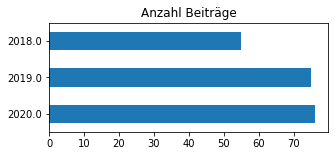

In [108]:
df['Jahr'].value_counts().plot(kind='barh', figsize=(5, 2), title='Anzahl Beiträge')

In [109]:
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')
df['Periode'] = df['Datum'].astype('datetime64[M]')

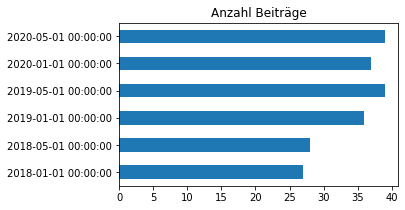

In [110]:
df['Periode'].value_counts().sort_index().plot(kind='barh', figsize=(5, 3), title='Anzahl Beiträge')

## Autorinnen und Autoren

**Gesamtzeitraum**

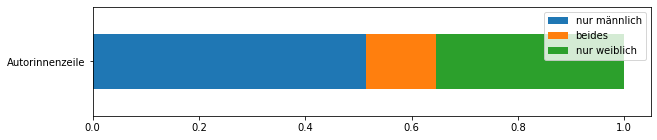

In [153]:
gr = df['Autorinnenzeile'].value_counts(normalize=True)
gr = gr.to_frame().sort_index().T
gr.plot(kind='barh', stacked=True, figsize=(10,2))

**pro Jahr**

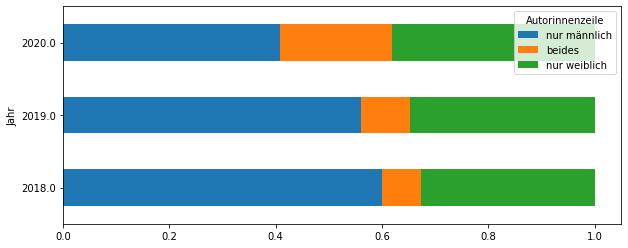

In [155]:
gr = df.groupby('Jahr')['Autorinnenzeile'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'Autorinnenzeile': 'value'}).reset_index()
gr = gr.pivot(index='Jahr', columns='Autorinnenzeile', values='value')
gr = gr[sorterAutorinnenzeile]
gr.plot(kind='barh', stacked=True, figsize=(10,4))

**pro Periode**

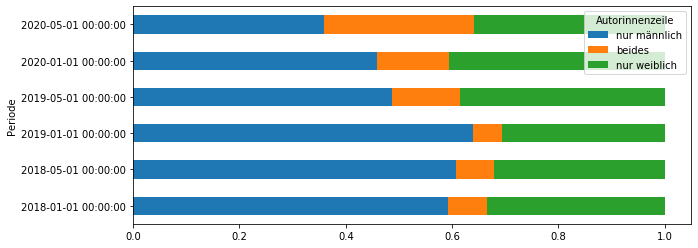

In [157]:
gr = df.groupby('Periode')['Autorinnenzeile'].value_counts(normalize=True)
gr = gr.to_frame().rename(columns={'Autorinnenzeile': 'value'}).reset_index()
gr = gr.pivot(index='Periode', columns='Autorinnenzeile', values='value')
gr = gr[sorterAutorinnenzeile]
gr.plot(kind='barh', stacked=True, figsize=(10,4))